#### Titration curve

The equivalence point of a titration curve is defined as, the inflection points of the second derivative.

This notebook uses scipy make_interp_spline, to create a "smooth" curve, and numpy to find the possible equivalence points.

https://en.wikipedia.org/wiki/Titration_curve

In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [2]:
# Dataset from a potentiometric titration. Should work for any kind of titration.
# If you want to read from a csv/excel file see pandas.read_csv
x = np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,26.5,28.5,30.5,32.5,34.5,36.5,38.5,40.5,41.5])
y = np.array([397,412,421,433,444,457,463,468,476,487,501,514,556,984,1129,1149,1162,1172,1173,1182,1184,1188])

In [3]:
# Helper function to calculate the inflection points

def find_inflection_points(x, y):
    """Find the inflection points using the second derivative"""
    d2y = np.gradient(np.gradient(y))
    inflection_points = []
    for i in range(len(d2y) - 1):
        if d2y[i] * d2y[i + 1] < 0:
            # found a sign change
            inflection_points.append((x[i], y[i]))
    return inflection_points


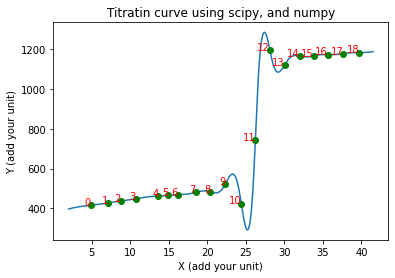

In [4]:
X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)


plt.plot(X_, Y_)
plt.title("Titratin curve using scipy, and numpy")
plt.xlabel("X (add your unit)")
plt.ylabel("Y (add your unit)")

points = find_inflection_points(X_,Y_)

i = 0
for x,y in points:
    plt.plot(x,y, "go")
    plt.text(x,y,i,horizontalalignment='right',c="r")
    i += 1

plt.show()

In [5]:
# Choose the index from the graph above
i = 11
print(f"X = {points[i][0]} og Y = {points[i][1]}")
print(f"X = {round(points[i][0],0)} og Y = {round(points[i][1],0)}")


X = 26.222444889779556 og Y = 743.8462200583804
X = 26.0 og Y = 744.0
